In [6]:
# read in the pheno data and plot variability of phenos vs each different biomarker data
require('tidyverse')
require('data.table')

phase_meno <- fread("../data/phase_meno_qc.txt", header=TRUE, data.table=FALSE)
hormone_drug <- fread("../data/id_to_hormone_drug.txt", header=TRUE, data.table=FALSE)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose



In [2]:
hormone_dat_v0 <- filter(phase_meno, visit==0)

In [3]:
biomarker_phe <- fread("../phe_extraction/sm_biomarker_tab.txt", data.table=FALSE)
phe_paths <- fread("../phe_extraction/list_traits_w_paths.txt", header=TRUE, data.table=FALSE)

In [4]:
head(biomarker_phe)
COVARIATE_MATRIX <- '/oak/stanford/groups/mrivas/ukbb24983/sqc/ukb24983_GWAS_covar.phe'
cov_mat <- fread(COVARIATE_MATRIX, header=TRUE, data.table=FALSE)
cov_mat_sm <- cov_mat[,c("IID","age", "sex")]
removal_file_one <- '/oak/stanford/groups/mrivas/ukbb/24983/sqc/ukb24983_remove.phe'
removal_file_two <- '/oak/stanford/groups/mrivas/ukbb/24983/sqc/w24983_20181016.csv'
remove1 <- fread(removal_file_one, header=FALSE, data.table=FALSE)
remove2 <- fread(removal_file_two, header=FALSE, data.table=FALSE) 
ids.to.remove <- c(remove1[,1], unique(remove2[,1]))
cov_mat_filt <- cov_mat_sm[!(cov_mat_sm$IID %in% ids.to.remove),]
combined_mat <- left_join(cov_mat_filt, biomarker_phe, by=c("IID"="f.eid"))

f.eid,30600,30610,30620,30630,30640,30650,30660,30670,30680,⋯,30800,30810,30820,30830,30840,30850,30860,30870,30880,30890
5586147,NA,114.3,100.78,NA,0.807,57.4,2.24,6.19,NA,⋯,NA,NA,NA,NA,8.88,11.419,NA,2.509,350.3,67.8
5144865,NA,59.6,20.66,NA,0.850,15.6,1.40,4.38,NA,⋯,NA,NA,NA,NA,7.80,11.395,NA,4.416,414.2,26.2
2845962,46.07,83.4,43.99,1.300,1.180,33.1,2.09,6.61,2.395,⋯,NA,1.045,12.7,36.27,12.13,12.911,75.09,1.792,422.2,56.6
3390045,47.45,41.4,35.54,1.840,1.335,28.0,NA,4.22,2.342,⋯,NA,1.068,NA,24.22,4.43,8.204,72.45,1.460,524.3,77.8
4264965,45.75,61.1,18.10,1.985,1.022,23.8,1.59,3.90,2.505,⋯,NA,1.201,NA,89.68,8.26,0.675,78.93,1.200,191.2,12.1
3131746,49.71,108.5,21.24,1.679,1.057,NA,NA,5.51,2.576,⋯,NA,1.430,NA,38.54,NA,0.986,82.51,2.215,368.9,58.9


In [5]:
biomarker <- read.table("../phe_extraction/list_biomarker.txt", header=TRUE)
rownames(biomarker) <- biomarker$Field
head(biomarker)
head(combined_mat)

,Field,name
30620,30620,Alanine aminotransferase
30600,30600,Albumin
30610,30610,Alkaline phosphatase
30630,30630,Apolipoprotein A
30640,30640,Apolipoprotein B
30650,30650,Aspartate aminotransferase


IID,age,sex,30600,30610,30620,30630,30640,30650,30660,⋯,30800,30810,30820,30830,30840,30850,30860,30870,30880,30890
2502845,50,1,45.64,55.3,30.11,1.296,1.068,28.2,2.55,⋯,NA,1.283,NA,56.45,15.84,14.928,70.04,1.390,374.1,68.8
2314965,55,0,NA,49.5,17.03,NA,1.619,18.2,NA,⋯,NA,NA,NA,NA,3.81,0.947,NA,3.386,NA,NA
1142584,60,0,47.06,176.2,42.71,1.605,0.815,45.2,1.73,⋯,NA,1.316,NA,62.54,8.19,0.754,72.76,1.671,266.6,55.1
3665122,74,0,47.47,62.7,19.66,1.788,1.423,24.1,1.53,⋯,NA,1.245,NA,51.03,9.27,1.015,76.86,1.311,290.2,73.6
4377492,65,0,48.13,88.0,34.51,1.720,1.249,25.2,1.22,⋯,NA,1.165,22.5,45.99,6.14,0.519,71.06,2.506,312.3,51.9
4015997,50,0,45.92,74.9,12.72,1.384,0.893,16.1,1.33,⋯,NA,1.146,NA,66.75,7.52,0.946,73.14,0.780,306.9,56.5


In [7]:
hdat <- select(hormone_dat_v0, -age_v0, -visit, -ooph, -hyster, -meno, 
                -hyster2, -meno.age, -years.post, -surgical.meno, -outside_cycle, -day_in_cycle)
table(hdat$qc_fail)
hdat2 <- select(filter(hdat, qc_fail!=1), -qc_fail, -sex) # removed 2712 for qc issues



     0      1 
292519   2712 

Divide into pre + post menopausal
* remove: peri, surgical_meno, premature, likely_meno
* remove: pregnant, HRT, pill, hormone-related medication


In [8]:
colnames(hdat2)
nrow(hdat2)
hdat2$preg <- as.factor(hdat2$preg)
hdat2$pill<- as.factor(hdat2$pill)
hdat2$hrt<- as.factor(hdat2$hrt)
hdat2$meno.label<- as.factor(hdat2$meno.label)
hdat2$irregular<- as.factor(hdat2$irregular)
hdat2$menstrual_phase<- as.factor(hdat2$menstrual_phase)
summary(hdat2)

[1] "IID"                     "preg"                   
 [3] "pill"                    "hrt"                    
 [5] "meno.label"              "period_today"           
 [7] "irregular"               "cycle_length"           
 [9] "normalized_day_in_cycle" "menstrual_phase"

[1] 292519

      IID            preg          pill          hrt        
 Min.   :1000028   0   :291445   -9  : 23708   -9  : 10631  
 1st Qu.:2258440   1   :   403   0   :207387   0   : 82696  
 Median :3510053   NA's:   671   1   :  5304   1   : 17847  
 Mean   :3510595                 NA's: 56120   NA's:181345  
 3rd Qu.:4762418                                            
 Max.   :6026191                                            
                                                            
         meno.label      period_today    irregular      cycle_length   
 post         :136898   Min.   :0.00     0   : 48978   Min.   :12.00   
 pre          : 59320   1st Qu.:0.00     1   : 11243   1st Qu.:25.00   
 surgical_meno: 53428   Median :0.00     NA's:232298   Median :28.00   
 missing      : 21771   Mean   :0.15                   Mean   :26.67   
 premature    : 14124   3rd Qu.:0.00                   3rd Qu.:28.00   
 likely_meno  :  6788   Max.   :1.00                   Max.   :60.00   
 (Other)

In [9]:
summary(hdat2)

      IID            preg          pill          hrt        
 Min.   :1000028   0   :291445   -9  : 23708   -9  : 10631  
 1st Qu.:2258440   1   :   403   0   :207387   0   : 82696  
 Median :3510053   NA's:   671   1   :  5304   1   : 17847  
 Mean   :3510595                 NA's: 56120   NA's:181345  
 3rd Qu.:4762418                                            
 Max.   :6026191                                            
                                                            
         meno.label      period_today    irregular      cycle_length   
 post         :136898   Min.   :0.00     0   : 48978   Min.   :12.00   
 pre          : 59320   1st Qu.:0.00     1   : 11243   1st Qu.:25.00   
 surgical_meno: 53428   Median :0.00     NA's:232298   Median :28.00   
 missing      : 21771   Mean   :0.15                   Mean   :26.67   
 premature    : 14124   3rd Qu.:0.00                   3rd Qu.:28.00   
 likely_meno  :  6788   Max.   :1.00                   Max.   :60.00   
 (Other)

In [10]:
head(hormone_drug)
hormone_meta <- read.delim("../data/hormone_drugs_todownload.txt")
colnames(hormone_meta)
dim(hormone_drug)
hormone_drug[,2:ncol(hormone_drug)] <- data.frame(apply(hormone_drug[,2:ncol(hormone_drug)] ,2, function(x) as.factor(as.numeric(x))))
summary(hormone_drug)

IID,clomifene,cyproterone,danazol,desogestrel,diethylstilbestrol,drospirenone,dutasteride,dydrogesterone,estradiol,⋯,levonorgestrel,medroxyprogesterone acetate,megestrol,mesterolone,methyltestosterone,norethisterone,progesterone,raloxifene,testosterone,tibolone
5246110,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
4263041,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
2224100,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
1242351,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
1787587,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
1300650,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0


[1] "code"        "drug"        "read_codes"  "drugbank_id" "hormone"

[1] 5926   26

      IID          clomifene cyproterone danazol  desogestrel
 Min.   :1002578   0:5923    0:5879      0:5908   0:5872     
 1st Qu.:2242402   1:   3    1:  47      1:  18   1:  54     
 Median :3506399                                             
 Mean   :3513417                                             
 3rd Qu.:4812053                                             
 Max.   :6025649                                             
 diethylstilbestrol drospirenone dutasteride dydrogesterone estradiol estriol 
 0:5908             0:5922       0:5525      0:5897         0:4939    0:5680  
 1:  18             1:   4       1: 401      1:  29         1: 987    1: 246  
                                                                              
                                                                              
                                                                              
                                                                              
 ethinylestra

In [11]:
count_by_drug <- apply(hormone_drug, 2, function(x) sum(x==1))
    count_by_drug

IID                   clomifene 
                          0                           3 
                cyproterone                     danazol 
                         47                          18 
                desogestrel          diethylstilbestrol 
                         54                          18 
               drospirenone                 dutasteride 
                          4                         401 
             dydrogesterone                   estradiol 
                         29                         987 
                    estriol            ethinylestradiol 
                        246                          30 
               etonogestrel                   etynodiol 
                         14                           3 
                finasteride         hydroxyprogesterone 
                       1977                           2 
             levonorgestrel medroxyprogesterone acetate 
                         41                          65 
                  megestrol                 mesterolone 
                         18                           3 
         methyltestosterone              norethisterone 
                          1                         318 
               progesterone                  raloxifene 
                        181                         333 
               testosterone                    tibolone 
                        346                         876

In [12]:
drug_taken <- filter(hormone_meta, drug %in% colnames(hormone_drug)[2:ncol(hormone_drug)])

drug_taken$count <- sapply(drug_taken$drug, function(x) count_by_drug[as.character(x)])
drug2 <- filter(drug_taken, !is.na(count))
drug2[order(drug2$hormone, drug2$drug),]

,code,drug,read_codes,drugbank_id,hormone,count
20,G03GB02,clomifene,1141180944,DB00882,estrogen,3
22,G03XA01,danazol,1140868968;1141157298,DB01406,estrogen,18
13,"G03CB02, G03CC05",diethylstilbestrol,1140909848,DB00255,estrogen,18
25,G03CA03,estradiol,1141181700,DB00783,estrogen,987
17,"G03CA04, G03CC06",estriol,1141181594,DB04573,estrogen,246
10,G03CA01,ethinylestradiol,1141181218;1141181220,DB00977,estrogen,30
7,G03XC01,raloxifene,1141168574,DB00481,estrogen,333
23,G03CX01,tibolone,1140868482,DB09070,estrogen,876
4,G03AC09,desogestrel,1140857912;1141182794,DB00304,progesterone,54
12,G03AC10,drospirenone,1141179820,DB01395,progesterone,4


In [27]:
# these drugs DO affect things
# - on T drug
# - on HRT
# - on pill
# - on any_hormone_drug
hrt_drugs <- c("diethylstilbestrol", "estradiol", "estriol", "tibolone")
hc_drugs <- c("ethinylestradiol", "desogestrel", "drospirenone", "dydrogesterone", "etonogestrel", 
              "hydroxyprogesterone", 
              "levonorgestrel", "norethisterone")
t_drugs <- c("dutasteride", "finasteride", "testosterone")
hormone_drugs <- hormone_drug
hormone_drugs$any_d <- apply(hormone_drugs[,2:ncol(hormone_drugs)], 1, function(x) ifelse(any(x==1), 1, 0))
hormone_drugs$hrt_d <- apply(hormone_drugs[,hrt_drugs], 1, function(x) ifelse(any(x==1), 1, 0))
hormone_drugs$t_d <- apply(hormone_drugs[,t_drugs], 1, function(x) ifelse(any(x==1), 1, 0))
hormone_drugs$hc_d <- apply(hormone_drugs[,hc_drugs], 1, function(x) ifelse(any(x==1), 1, 0))
hormone_drugs2 <- select(hormone_drugs, IID, any_d, hrt_d, t_d, hc_d)
head(hormone_drugs2)
apply(hormone_drugs2, 2, sum)

IID,any_d,hrt_d,t_d,hc_d
5246110,1,0,0,0
4263041,1,0,0,0
2224100,1,0,0,0
1242351,1,0,0,0
1787587,1,0,0,0
1300650,1,0,0,0


IID       any_d       hrt_d         t_d        hc_d 
20820511511        5926        2121        2718         491

In [22]:
combined_mat2 <- combined_mat
colnames(combined_mat2)[4:ncol(combined_mat2)] <- sapply(biomarker[colnames(combined_mat)[4:ncol(combined_mat)],]$name, as.character)
head(combined_mat2)

IID,age,sex,Albumin,Alkaline phosphatase,Alanine aminotransferase,Apolipoprotein A,Apolipoprotein B,Aspartate aminotransferase,Direct bilirubin,⋯,Oestradiol,Phosphate,Rheumatoid factor,SHBG,Total bilirubin,Testosterone,Total protein,Triglycerides,Urate,Vitamin D
2502845,50,1,45.64,55.3,30.11,1.296,1.068,28.2,2.55,⋯,NA,1.283,NA,56.45,15.84,14.928,70.04,1.390,374.1,68.8
2314965,55,0,NA,49.5,17.03,NA,1.619,18.2,NA,⋯,NA,NA,NA,NA,3.81,0.947,NA,3.386,NA,NA
1142584,60,0,47.06,176.2,42.71,1.605,0.815,45.2,1.73,⋯,NA,1.316,NA,62.54,8.19,0.754,72.76,1.671,266.6,55.1
3665122,74,0,47.47,62.7,19.66,1.788,1.423,24.1,1.53,⋯,NA,1.245,NA,51.03,9.27,1.015,76.86,1.311,290.2,73.6
4377492,65,0,48.13,88.0,34.51,1.720,1.249,25.2,1.22,⋯,NA,1.165,22.5,45.99,6.14,0.519,71.06,2.506,312.3,51.9
4015997,50,0,45.92,74.9,12.72,1.384,0.893,16.1,1.33,⋯,NA,1.146,NA,66.75,7.52,0.946,73.14,0.780,306.9,56.5


In [28]:
hdat2.1 <- left_join(hdat2, hormone_drugs2)
hdat3 <- select(hdat2.1, -cycle_length)

hormone_biomarker <- full_join(hdat3, combined_mat2, by="IID")
head(hormone_biomarker)
hormone_biomarker2 <- select(hormone_biomarker, IID, sex, age, everything())

Joining, by = "IID"


IID,preg,pill,hrt,meno.label,period_today,irregular,normalized_day_in_cycle,menstrual_phase,any_d,⋯,Oestradiol,Phosphate,Rheumatoid factor,SHBG,Total bilirubin,Testosterone,Total protein,Triglycerides,Urate,Vitamin D
2314965,0,0,NA,missing,0,NA,NA,NA,NA,⋯,NA,NA,NA,NA,3.81,0.947,NA,3.386,NA,NA
1142584,0,0,0,post,NA,NA,NA,NA,NA,⋯,NA,1.316,NA,62.54,8.19,0.754,72.76,1.671,266.6,55.1
3665122,0,NA,0,surgical_meno,NA,NA,NA,NA,NA,⋯,NA,1.245,NA,51.03,9.27,1.015,76.86,1.311,290.2,73.6
4377492,0,0,NA,post,NA,NA,NA,NA,NA,⋯,NA,1.165,22.5,45.99,6.14,0.519,71.06,2.506,312.3,51.9
4015997,0,0,NA,pre,1,0,0,menstrual,NA,⋯,NA,1.146,NA,66.75,7.52,0.946,73.14,0.780,306.9,56.5
2076736,0,0,NA,post,NA,NA,NA,NA,NA,⋯,NA,1.357,NA,65.68,6.30,0.506,71.27,0.871,NA,84.2


In [29]:
write.table(hormone_biomarker2, file="../data/hormone_drug_biomarker_df.txt", sep="\t", row.names=FALSE, quote=FALSE)

In [4]:
hormone_biomarker2 <- read.table("../data/hormone_drug_biomarker_df.txt", sep="\t", header=TRUE)

table(hormone_biomarker2$meno.label)
table(combined_mat2$sex)



  likely_meno          male       missing   missing_age          post 
         6788           152         21771            38        136898 
          pre     premature surgical_meno 
        59320         14124         53428 

ERROR: Error in table(combined_mat2$sex): object 'combined_mat2' not found


In [5]:
head(hormone_biomarker2)

IID,sex,age,preg,pill,hrt,meno.label,period_today,irregular,normalized_day_in_cycle,⋯,Oestradiol,Phosphate,Rheumatoid.factor,SHBG,Total.bilirubin,Testosterone,Total.protein,Triglycerides,Urate,Vitamin.D
2314965,0,55,0,0,NA,missing,0,NA,NA,⋯,NA,NA,NA,NA,3.81,0.947,NA,3.386,NA,NA
1142584,0,60,0,0,0,post,NA,NA,NA,⋯,NA,1.316,NA,62.54,8.19,0.754,72.76,1.671,266.6,55.1
3665122,0,74,0,NA,0,surgical_meno,NA,NA,NA,⋯,NA,1.245,NA,51.03,9.27,1.015,76.86,1.311,290.2,73.6
4377492,0,65,0,0,NA,post,NA,NA,NA,⋯,NA,1.165,22.5,45.99,6.14,0.519,71.06,2.506,312.3,51.9
4015997,0,50,0,0,NA,pre,1,0,0,⋯,NA,1.146,NA,66.75,7.52,0.946,73.14,0.780,306.9,56.5
2076736,0,60,0,0,NA,post,NA,NA,NA,⋯,NA,1.357,NA,65.68,6.30,0.506,71.27,0.871,NA,84.2


In [7]:
# BROAD CATEGORIES
# - period_today
# - pill
# - HRT
# - male
# - post-menopause
# - pre-menopause

hormone_biomarker2$meno.label[hormone_biomarker2$sex==1] <- "male"
table(hormone_biomarker2$meno.label)

hormone_biomarker3 <- filter(hormone_biomarker2, (is.na(preg) | preg==0) &
                             (meno.label %in% c("male", "pre", "post")) & 
                            (irregular!=1 | is.na(irregular)))
dim(hormone_biomarker3)  # removed ~100k
dim(hormone_biomarker2)


  likely_meno          male       missing   missing_age          post 
         6788        156273         21771            38        136898 
          pre     premature surgical_meno 
        59320         14124         53428 

[1] 343149     45

[1] 449835     45

In [8]:
hormone_biomarker4 <- select(hormone_biomarker3, -normalized_day_in_cycle, -irregular, -preg)

colnames(hormone_biomarker4)
hormone_biomarker4[is.na(hormone_biomarker4)] <- -9
summary(hormone_biomarker4)
table(hormone_biomarker4$meno.label)
hormone_biomarker5 <- hormone_biomarker4 %>% mutate(
                             hormone_category=ifelse(sex==1, "male", 
                                                     ifelse(meno.label=="post", 
                                                            ifelse(hrt_d!=1 & hrt != 1 ,"post", "hrt"),
                                                            ifelse(pill==1 | hc_d==1, 
                                                              ifelse(period_today==1, "menstrual_pill", "pill"),
                                                             ifelse(period_today==1, "menstrual", "pre")))))
                                            
                                                                                          
                            





[1] "IID"                        "sex"                       
 [3] "age"                        "pill"                      
 [5] "hrt"                        "meno.label"                
 [7] "period_today"               "menstrual_phase"           
 [9] "any_d"                      "hrt_d"                     
[11] "t_d"                        "hc_d"                      
[13] "Albumin"                    "Alkaline.phosphatase"      
[15] "Alanine.aminotransferase"   "Apolipoprotein.A"          
[17] "Apolipoprotein.B"           "Aspartate.aminotransferase"
[19] "Direct.bilirubin"           "Urea"                      
[21] "Calcium"                    "Cholesterol"               
[23] "Creatinine"                 "C.reactive.protein"        
[25] "Cystatin.C"                 "Gamma.glutamyltransferase" 
[27] "Glucose"                    "Glycated.haemoglobin"      
[29] "HDL.cholesterol"            "IGF.1"                     
[31] "LDL.direct"                 "Lipoprotein.A"             
[33] "Oestradiol"                 "Phosphate"                 
[35] "Rheumatoid.factor"          "SHBG"                      
[37] "Total.bilirubin"            "Testosterone"              
[39] "Total.protein"              "Triglycerides"             
[41] "Urate"                      "Vitamin.D"

Warning message in `[<-.factor`(`*tmp*`, thisvar, value = -9):
“invalid factor level, NA generated”

      IID               sex              age             pill      
 Min.   :     -7   Min.   :-9.000   Min.   :-9.00   Min.   :-9.00  
 1st Qu.:2257251   1st Qu.: 0.000   1st Qu.:53.00   1st Qu.:-9.00  
 Median :3513731   Median : 0.000   Median :64.00   Median :-9.00  
 Mean   :3513292   Mean   :-1.084   Mean   :52.92   Mean   :-5.34  
 3rd Qu.:4770463   3rd Qu.: 1.000   3rd Qu.:71.00   3rd Qu.: 0.00  
 Max.   :6026237   Max.   : 1.000   Max.   :81.00   Max.   : 1.00  
                                                                   
      hrt               meno.label      period_today       menstrual_phase  
 Min.   :-9.000   male       :156272   Min.   :-9.000   follicular :  9638  
 1st Qu.:-9.000   post       :136873   1st Qu.:-9.000   late-luteal:  2898  
 Median :-9.000   pre        : 50004   Median :-9.000   luteal     :  9878  
 Mean   :-7.581   likely_meno:     0   Mean   :-7.735   menstrual  :  8205  
 3rd Qu.:-9.000   missing    :     0   3rd Qu.:-9.000   peri-ov    :  9


  likely_meno          male       missing   missing_age          post 
            0        156272             0             0        136873 
          pre     premature surgical_meno 
        50004             0             0 

In [9]:
table(hormone_biomarker5$hormone_category)     


           hrt           male      menstrual menstrual_pill           pill 
          6485         156121           7754            451           2930 
          post            pre 
        130388          39020 

In [10]:
hormone_biomarker6 <- select(hormone_biomarker5, -sex, -pill, -hrt, -meno.label, -period_today,-menstrual_phase,-any_d,-hrt_d,-hc_d,-t_d)

colnames(hormone_biomarker6)<- c(
'IID', 'age' ,'Albumin', 'Alk phosph' ,'Ala AT', 'Apo A' ,
    'Apo B', 'Asp AT' ,'bili (d)' ,'Urea', 'Calcium','Cholesterol','Creatinine ','CRP' ,
    'Cys C' ,'Gamma glut' ,'Glucose ','haemoglobin', 'HDL', 'IGF-1 ', 
    'LDL' ,'Lip A' ,'Oestradiol ', 'Phosphate ', 'RF', 'SHBG ', 'bili (tot)' ,
    'Testosterone', 'protein' ,
    'TG' ,'Urate ' ,'Vitamin D' ,'hormone_category')

In [11]:
require('reshape2')
dat.melted <- melt(hormone_biomarker6, id.vars=c("IID", "age",  "hormone_category"))
head(dat.melted)



Loading required package: reshape2

Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt

The following object is masked from ‘package:tidyr’:

    smiths



IID,age,hormone_category,variable,value
1142584,60,post,Albumin,47.06
4377492,65,post,Albumin,48.13
4015997,50,menstrual,Albumin,45.92
2076736,60,post,Albumin,43.68
1325300,59,hrt,Albumin,-9.00
5046164,66,post,Albumin,46.79


In [ ]:
ggplot(dat.melted, aes(x=age, y=value, colour=hormone_category, group=hormone_category))+geom_point()+facet_wrap(~variable, scales="free")


In [87]:
options(repr.plot.width=12, repr.plot.height=6)

ERROR: Error in +facet_wrap(~variable, ncol = 4, scales = "free"): invalid argument to unary operator


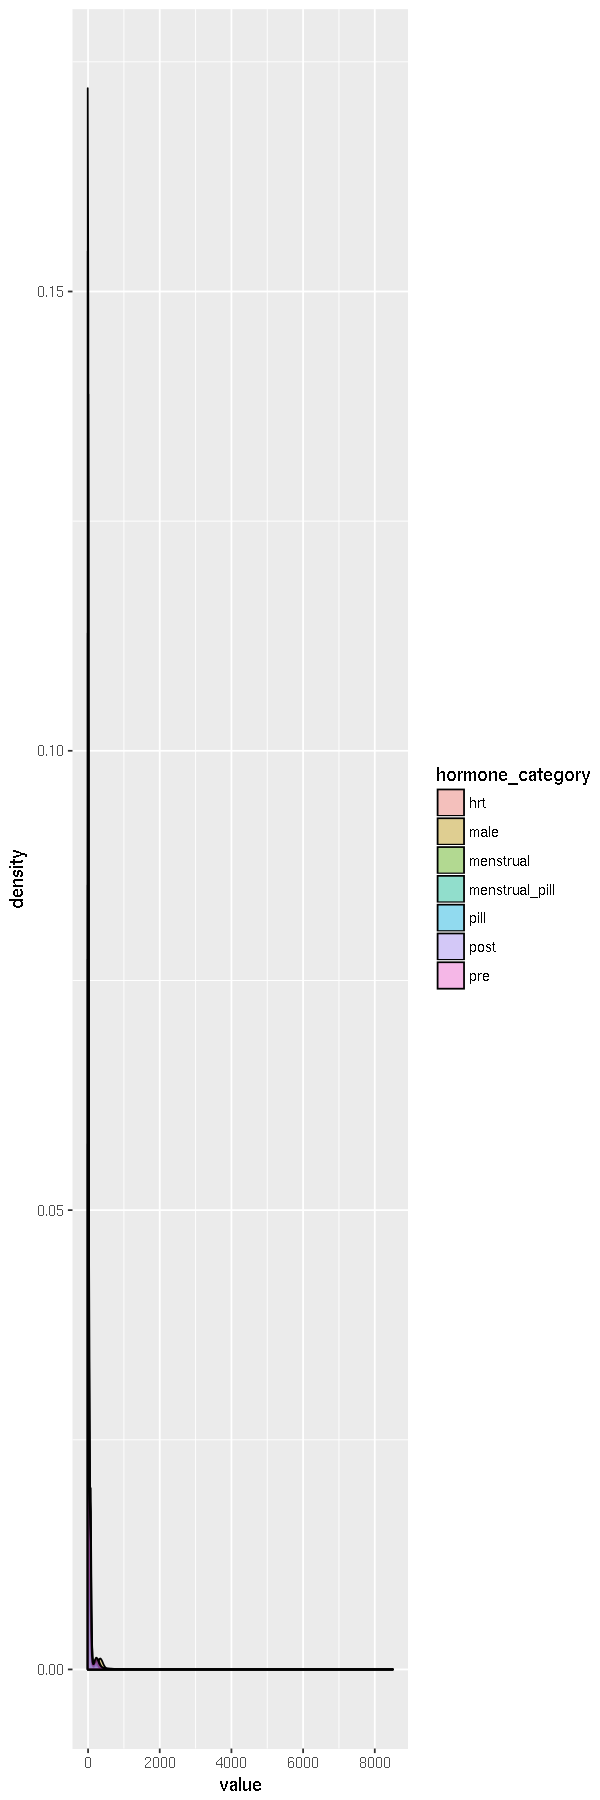

In [77]:
dat.melted %>% ggplot(aes(x=value)) + geom_density(aes(fill=hormone_category), alpha = 0.4)
+ facet_wrap(~variable, ncol=4, scales="free")

hormone_category,variable,mean_val,sd_val
hrt,Albumin,44.518262,2.5768639
hrt,Alk phosph,71.737158,21.7455331
hrt,Ala AT,18.553788,12.0856871
hrt,Apo A,1.644058,0.2974965
hrt,Apo B,1.030645,0.2189760
hrt,Asp AT,23.520479,7.3578428


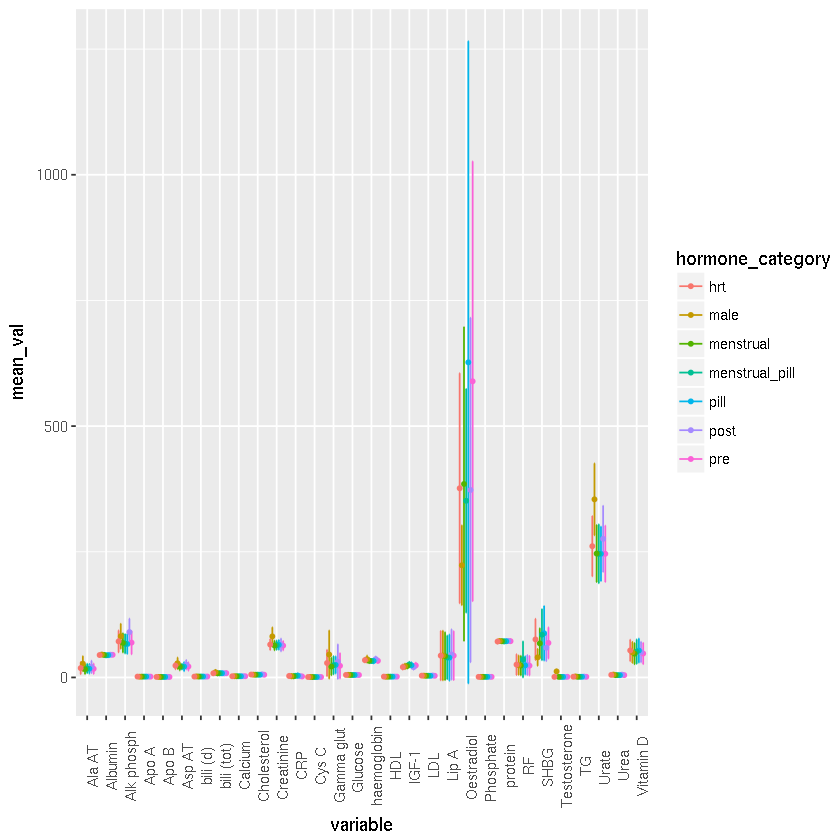

In [12]:
dat.melted2 <- filter(dat.melted, value > 0)
group_means <- dat.melted2 %>% group_by( hormone_category, variable) %>% summarize(mean_val=mean(value),sd_val=sd(value))
#group_means <- group_means %>% filter(meno.label %in% c("male", "pre", "post"))
head(group_means) 
group_means$hormone_category <- as.factor(group_means$hormone_category)
group_means$variable <- sapply(group_means$variable, as.character)
ggplot(group_means, aes(x=variable, y=mean_val, colour=hormone_category )) +
       geom_errorbar(aes(ymin=mean_val-sd_val, ymax=mean_val+sd_val), width=0.3, position=position_dodge(0.8))+
geom_point(size=1, position=position_dodge(0.8))+ theme(axis.text.x = element_text(angle = 90))


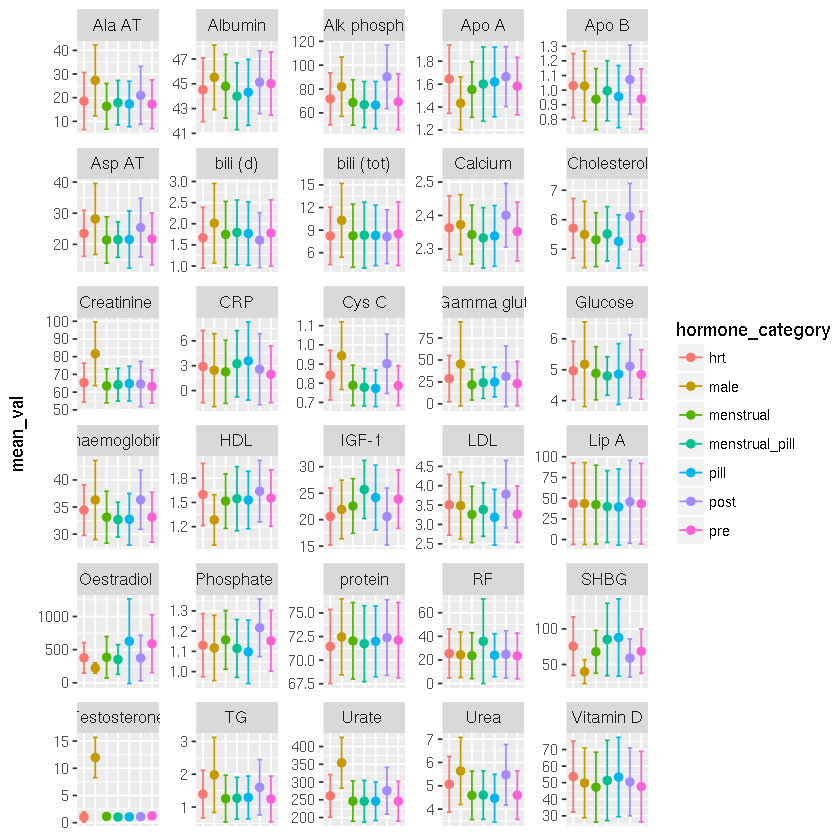

In [13]:



ggplot(group_means, aes(x=hormone_category, y=mean_val, colour=hormone_category )) +
       geom_errorbar(aes(ymin=mean_val-sd_val, ymax=mean_val+sd_val), width=0.4, position=position_dodge(0.7))+
geom_point(size=2, position=position_dodge(0.7)) +facet_wrap(~variable, scales="free", ncol=5)+
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
     strip.text = element_text(size=10))

In [ ]:
# plot vs age


In [114]:
head(dat.melted)
dat.melted$hormone_category <- as.factor(dat.melted$hormone_category)
sapply(unique(dat.melted$variable), function(x){
res.aov <- aov(value ~ hormone_category, data=filter(dat.melted, variable==x));
print(x);
print(summary(res.aov))})

IID,age,hormone_category,variable,value
1142584,60,post,Albumin,47.06
4377492,65,post,Albumin,48.13
4015997,50,menstrual,Albumin,45.92
2076736,60,post,Albumin,43.68
1325300,59,hrt,Albumin,-9.00
5046164,66,post,Albumin,46.79


[1] Albumin
30 Levels: Albumin Alk phosph Ala AT Apo A Apo B Asp AT bili (d) ... Vitamin D
                     Df    Sum Sq Mean Sq F value Pr(>F)    
hormone_category      6  21920972 3653495    6896 <2e-16 ***
Residuals        343142 181803893     530                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] Alk phosph
30 Levels: Albumin Alk phosph Ala AT Apo A Apo B Asp AT bili (d) ... Vitamin D
                     Df    Sum Sq  Mean Sq F value Pr(>F)    
hormone_category      6  69569843 11594974    6685 <2e-16 ***
Residuals        343142 595140517     1734                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] Ala AT
30 Levels: Albumin Alk phosph Ala AT Apo A Apo B Asp AT bili (d) ... Vitamin D
                     Df   Sum Sq Mean Sq F value Pr(>F)    
hormone_category      6 21546670 3591112   13004 <2e-16 ***
Residuals        343142 94763282     276                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.0

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
hormone_category,6,21920972,3653495.2553,6895.714,0
Residuals,343142,181803893,529.8212,NA,NA
,Df,Sum Sq,Mean Sq,F value,Pr(>F)
hormone_category,6,69569843,11594973.837,6685.35,0
Residuals,343142,595140517,1734.386,NA,NA
,Df,Sum Sq,Mean Sq,F value,Pr(>F)
hormone_category,6,21546670,3591111.5979,13003.57,0
Residuals,343142,94763282,276.1635,NA,NA
,Df,Sum Sq,Mean Sq,F value,Pr(>F)
hormone_category,6,730435.4,121739.22844,6022.016,0


Warning message:
“Removed 564 rows containing non-finite values (stat_density).”

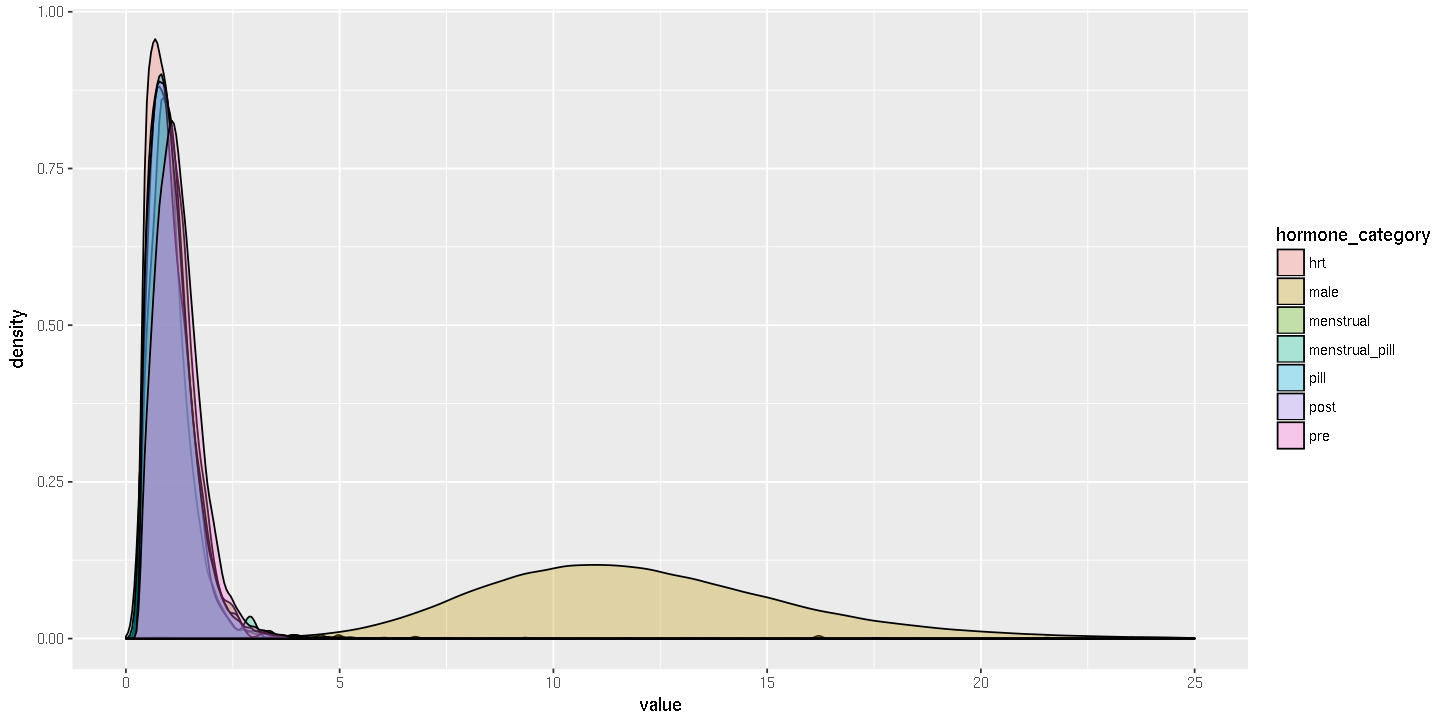

In [101]:
filter(dat.melted2, variable=="Testosterone") %>% ggplot(aes(x=value)) + 
geom_density(aes(fill=hormone_category), alpha = 0.3) + xlim(0, 25)

Warning message:
“Removed 2714 rows containing non-finite values (stat_density).”

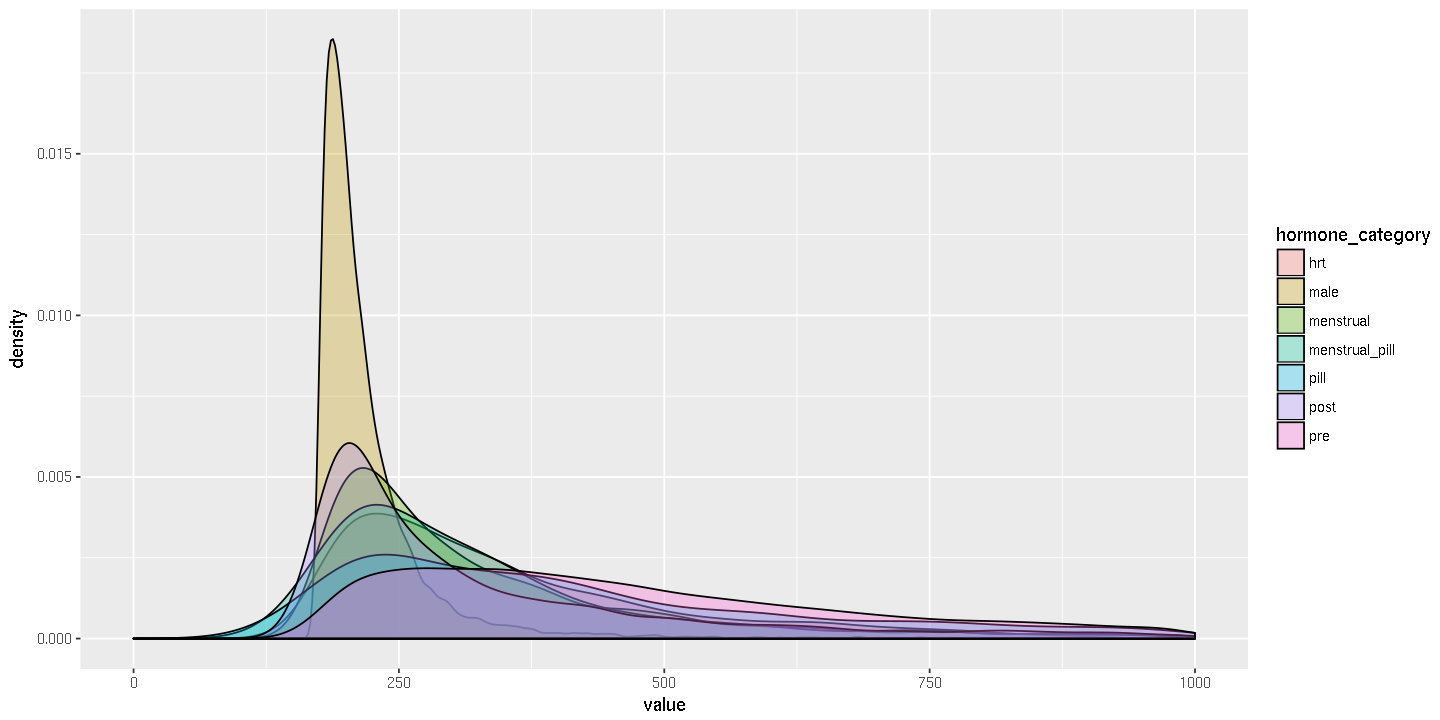

In [100]:
filter(dat.melted2, variable=="Oestradiol ") %>% ggplot(aes(x=value)) + 
geom_density(aes(fill=hormone_category), alpha = 0.3)+xlim(0,1000)

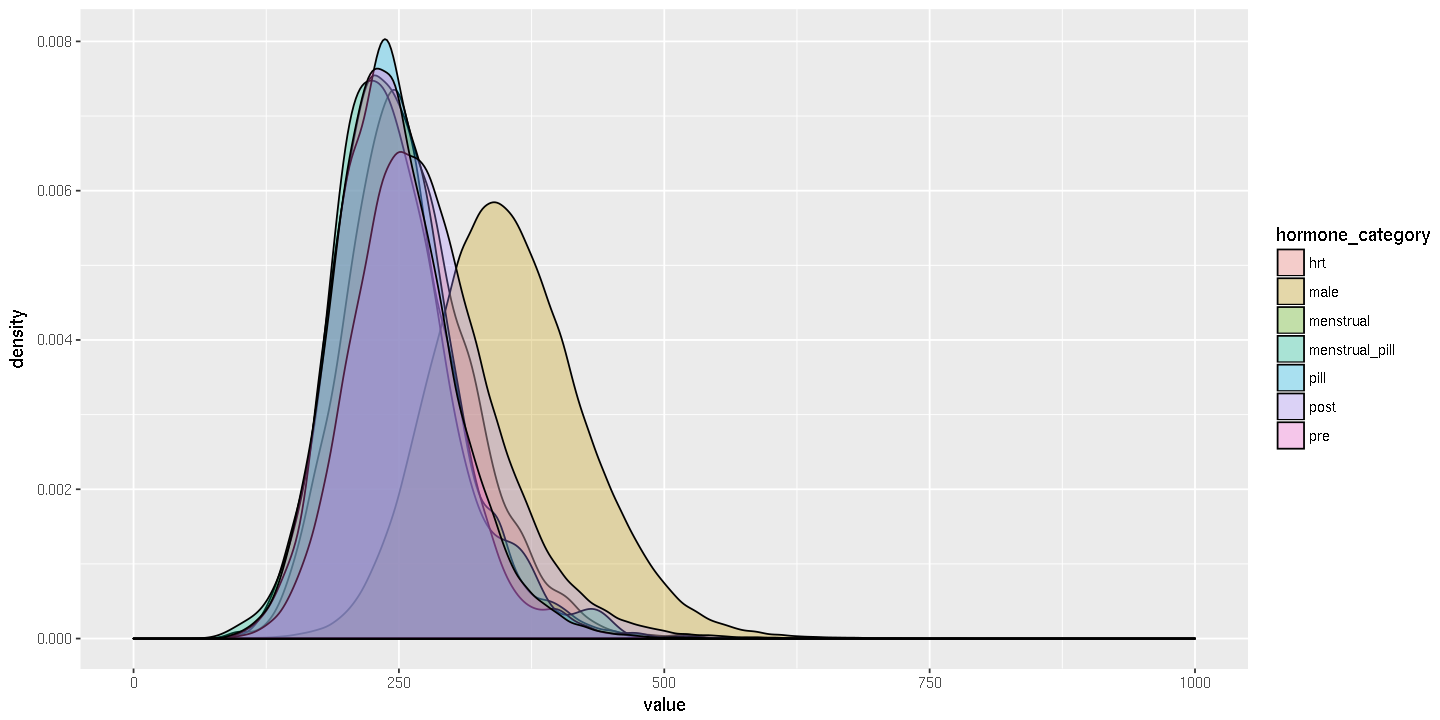

In [105]:
filter(dat.melted2, variable=="Urate ") %>% ggplot(aes(x=value)) + 
geom_density(aes(fill=hormone_category), alpha = 0.3)+xlim(0,1000)

In [ ]:
filter(dat.melted2, variable=="Urate ") %>% ggplot(aes(x=value)) + 
geom_density(aes(fill=hormone_category), alpha = 0.3)+xlim(0,1000)